# Analiza EDA danych dotyczących Titanica #

### Autor: Piotr Bednarski ###

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df2 = pd.read_csv('26__titanic.csv', sep=",")
df2

pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000    0.0    0.0   24160  211.3375       B5        S    2   
1       male   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   
2     female   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1305  female      NaN    1.0    0.0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000    0.0    0.0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000    0.0    0.0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000    0.0    0.0  315082    7.8750      NaN        S  NaN   
1309     NaN      NaN    NaN    NaN     NaN       NaN      NaN      NaN  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  
1309    NaN                              NaN  

[1310 rows x 14 columns]

# EDA: Krok 1 - wstępny przegląd danych

### Zaczynamy od zmiany nazw kolumn oraz wartości kolumny określającej płeć na język polski, aby łatwiej było nam analizować dane

In [7]:
df = df2.copy()
df.columns=['nr klasy','czy przeżył','imię','płeć','wiek','l.rodzeńs./małż. na pok.','l.rodzic/dzieci na pok.',
             'nr biletu','cena bil.','nr kabiny','pocz. port','nr łodzi rat.','nr ciała','destynacja']
#dużo prostsza metoda zamiany kolumn niż .rename(columns={ : })

df['płeć'] = df['płeć'].replace({'male':'M','female':'K'})

### Sprawdzamy podstawowe dane (częściowe wycinki danych, liczba rekordów, dane numeryczne, czy są duplikaty itd.)

In [8]:
df.head(5)

nr klasy  czy przeżył                                             imię  \
0       1.0          1.0                    Allen, Miss. Elisabeth Walton   
1       1.0          1.0                   Allison, Master. Hudson Trevor   
2       1.0          0.0                     Allison, Miss. Helen Loraine   
3       1.0          0.0             Allison, Mr. Hudson Joshua Creighton   
4       1.0          0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   

  płeć     wiek  l.rodzeńs./małż. na pok.  l.rodzic/dzieci na pok. nr biletu  \
0    K  29.0000                       0.0                      0.0     24160   
1    M   0.9167                       1.0                      2.0    113781   
2    K   2.0000                       1.0                      2.0    113781   
3    M  30.0000                       1.0                      2.0    113781   
4    K  25.0000                       1.0                      2.0    113781   

   cena bil. nr kabiny pocz. port nr łodzi rat.  nr ciała  \
0   211.3375        B5          S             2       NaN   
1   151.5500   C22 C26          S            11       NaN   
2   151.5500   C22 C26          S           NaN       NaN   
3   151.5500   C22 C26          S           NaN     135.0   
4   151.5500   C22 C26          S           NaN       NaN   

                        destynacja  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [9]:
df.tail(5)

nr klasy  czy przeżył                       imię płeć  wiek  \
1305       3.0          0.0      Zabour, Miss. Thamine    K   NaN   
1306       3.0          0.0  Zakarian, Mr. Mapriededer    M  26.5   
1307       3.0          0.0        Zakarian, Mr. Ortin    M  27.0   
1308       3.0          0.0         Zimmerman, Mr. Leo    M  29.0   
1309       NaN          NaN                        NaN  NaN   NaN   

      l.rodzeńs./małż. na pok.  l.rodzic/dzieci na pok. nr biletu  cena bil.  \
1305                       1.0                      0.0      2665    14.4542   
1306                       0.0                      0.0      2656     7.2250   
1307                       0.0                      0.0      2670     7.2250   
1308                       0.0                      0.0    315082     7.8750   
1309                       NaN                      NaN       NaN        NaN   

     nr kabiny pocz. port nr łodzi rat.  nr ciała destynacja  
1305       NaN          C           NaN       NaN        NaN  
1306       NaN          C           NaN     304.0        NaN  
1307       NaN          C           NaN       NaN        NaN  
1308       NaN          S           NaN       NaN        NaN  
1309       NaN        NaN           NaN       NaN        NaN

In [10]:
df.shape

(1310, 14)

In [11]:
df.duplicated().sum()

0

### - widzimy, że mamy w sumie 14 kolumn i 1310 rekordów, a w zasadzie 1310 osób.
### - dane nie mają duplikatów.

### Sprawdzimy jeszcze losowo próbkę danych:

In [12]:
df.sample(10)

nr klasy  czy przeżył                                            imię  \
87        1.0          1.0                     Daniel, Mr. Robert Williams   
574       2.0          0.0                 Turpin, Mr. William John Robert   
249       1.0          1.0                     Ryerson, Master. John Borie   
94        1.0          1.0                       Dodge, Master. Washington   
735       3.0          1.0  Coutts, Mrs. William (Winnie "Minnie" Treanor)   
880       3.0          1.0                              Jalsevac, Mr. Ivan   
42        1.0          1.0  Brown, Mrs. John Murray (Caroline Lane Lamson)   
104       1.0          1.0                  Eustis, Miss. Elizabeth Mussey   
840       3.0          0.0                             Haas, Miss. Aloisia   
286       1.0          0.0          Straus, Mrs. Isidor (Rosalie Ida Blun)   

    płeć  wiek  l.rodzeńs./małż. na pok.  l.rodzic/dzieci na pok.   nr biletu  \
87     M  27.0                       0.0                      0.0      113804   
574    M  29.0                       1.0                      0.0       11668   
249    M  13.0                       2.0                      2.0    PC 17608   
94     M   4.0                       0.0                      2.0       33638   
735    K  36.0                       0.0                      2.0  C.A. 37671   
880    M  29.0                       0.0                      0.0      349240   
42     K  59.0                       2.0                      0.0       11769   
104    K  54.0                       1.0                      0.0       36947   
840    K  24.0                       0.0                      0.0      349236   
286    K  63.0                       1.0                      0.0    PC 17483   

     cena bil.        nr kabiny pocz. port nr łodzi rat.  nr ciała  \
87     30.5000              NaN          S             3       NaN   
574    21.0000              NaN          S           NaN       NaN   
249   262.3750  B57 B59 B63 B66          C             4       NaN   
94     81.8583              A34          S             5       NaN   
735    15.9000              NaN          S             2       NaN   
880     7.8958              NaN          C            15       NaN   
42     51.4792             C101          S             D       NaN   
104    78.2667              D20          C             4       NaN   
840     8.8500              NaN          S           NaN       NaN   
286   221.7792          C55 C57          S           NaN       NaN   

                          destynacja  
87                  Philadelphia, PA  
574                Plymouth, England  
249  Haverford, PA / Cooperstown, NY  
94                 San Francisco, CA  
735             England Brooklyn, NY  
880                              NaN  
42                       Belmont, MA  
104                    Brookline, MA  
840                              NaN  
286                     New York, NY

### - na podstawie tej próbki możemy faktycznie zauważyć, że mamy pełen przekrój danych, zarówno imiona i nazwiska pasażerów, czy mieli bliskich na pokładzie, czy przeżyli, jaki nr klasy, cena biletu, skąd dokąd podróżowali i wiele innych informacji. 

### - możemy też od razu dostrzec, że pojawiają się brakujące dane 'NaN', które będziemy dalej eksplorować w kolejnym kroku

# EDA: Krok 2 - sprawdzenie brakujących wartości

In [13]:
#odpalamy kod na wyliczenie brakujących wartości 
df.isnull().sum()

nr klasy                       1
czy przeżył                    1
imię                           1
płeć                           1
wiek                         264
l.rodzeńs./małż. na pok.       1
l.rodzic/dzieci na pok.        1
nr biletu                      1
cena bil.                      2
nr kabiny                   1015
pocz. port                     3
nr łodzi rat.                824
nr ciała                    1189
destynacja                   565
dtype: int64

In [14]:
#sprawdzamy czy nie ma sytuacji, gdzie jakiś rekord ma same brakujące wartości (wówczas usuniemy)
df[df.isna().all(axis=1)]

nr klasy  czy przeżył imię płeć  wiek  l.rodzeńs./małż. na pok.  \
1309       NaN          NaN  NaN  NaN   NaN                       NaN   

      l.rodzic/dzieci na pok. nr biletu  cena bil. nr kabiny pocz. port  \
1309                      NaN       NaN        NaN       NaN        NaN   

     nr łodzi rat.  nr ciała destynacja  
1309           NaN       NaN        NaN

In [15]:
# mamy go! to wiesz indeksu 1309 - usuwamy! 
df = df.drop(index=1309)

In [16]:
df.shape # mamy teraz 1309, a wcześniej było 1310. Zgadza się i pozbyliśmy się zbędnego wiesza. Mamy dane 1309 osób.

(1309, 14)

In [17]:
df.isnull().sum() #wygląda to dużo lepiej.

nr klasy                       0
czy przeżył                    0
imię                           0
płeć                           0
wiek                         263
l.rodzeńs./małż. na pok.       0
l.rodzic/dzieci na pok.        0
nr biletu                      0
cena bil.                      1
nr kabiny                   1014
pocz. port                     2
nr łodzi rat.                823
nr ciała                    1188
destynacja                   564
dtype: int64

<Axes: >

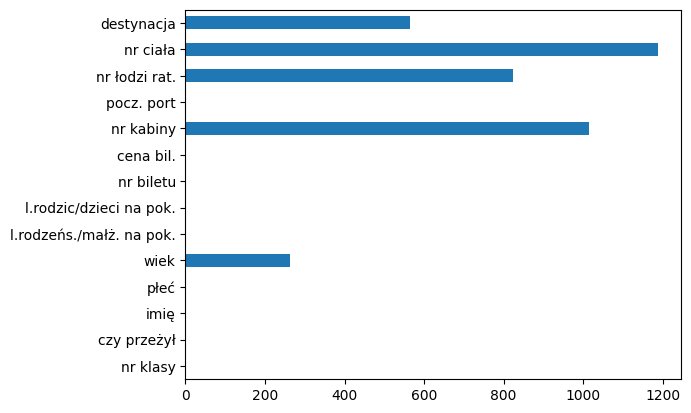

In [18]:
# przedstawiamy wyniki w postaci poziomego wykresu
w = df.isnull().sum()
w.plot(kind='barh')

## OBSERWACJE: 

### - wizualizacja pokazuje, że najwięcej brakuje w kolumnach: nr ciała, nr kabiny, nr łodzi ratunkowej czy destynacji
### - brak numerów ciał może wynikać z faktu, że wiele ciał nie zostało odnalezionych 
### - pozostałe braki spróbujemy zbadać dalej w kolejnych etapach analizy (ostatni krok)

# EDA: Krok 3 - badanie pojedynczych zmiennych / kolumn

In [19]:
#sprawdzamy poszczególne zmienne jak się zachowują, zaczniemy od kolumny 'czy przeżył'
df['czy przeżył'].value_counts()

czy przeżył
0.0    809
1.0    500
Name: count, dtype: int64

## OBSERWACJE: 

### - widzimy, że z liczby gości na statku, których dane udało się pozyskać przeżyło tylko 500 osób, a nie przeżyło aż 809 
### - gdyby doliczyć osoby ze statku, o których nie mamy dokładnych informacji, te liczby będą się różniły

In [20]:
df['płeć'].value_counts() #sprawdzamy ile ogólnie kobiet i mężczyn było z danych o których wiemy

płeć
M    843
K    466
Name: count, dtype: int64

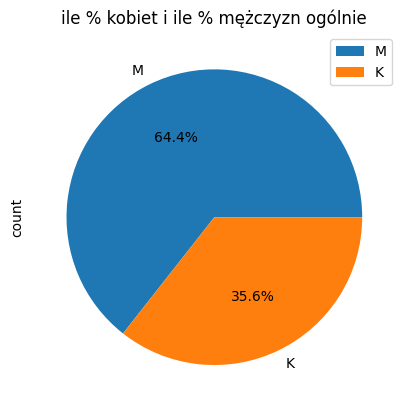

In [22]:
#sprawdzamy jaki był rozkład procentowy kobiet i mężczyzn na pokładzie, o których wiemy:
df['płeć'].value_counts().plot(kind='pie',title='ile % kobiet i ile % mężczyzn ogólnie',autopct='%1.1f%%', legend=True); 

## OBSERWACJE: 

### - 64,4% gości o których wiemy stanowili mężczyźni (M), a w mniejszości były kobiety (K) stanowiąc 35,6% 
### - nie znamy dokładnej liczby wszystkich kobiet i mężczyzn, gdyż w kolumnach dot. bliskich mamy tylko liczbę osób towarzyszących bez ich właściwych danych o płci

# EDA: Krok 4 - transformacja danych / naprawa danych

In [23]:
df[df['nr biletu'].str.contains('W./C. 6608')]  
#tutaj jasno widzimy, że mamy dużo więcej osób na bilecie W./C. 6608 niż powinniśmy

nr klasy  czy przeżył                                     imię płeć  \
806       3.0          0.0     Ford, Miss. Doolina Margaret "Daisy"    K   
807       3.0          0.0         Ford, Miss. Robina Maggie "Ruby"    K   
809       3.0          0.0                  Ford, Mr. Edward Watson    M   
810       3.0          0.0                   Ford, Mr. William Neal    M   
811       3.0          0.0  Ford, Mrs. Edward (Margaret Ann Watson)    K   

     wiek  l.rodzeńs./małż. na pok.  l.rodzic/dzieci na pok.   nr biletu  \
806  21.0                       2.0                      2.0  W./C. 6608   
807   9.0                       2.0                      2.0  W./C. 6608   
809  18.0                       2.0                      2.0  W./C. 6608   
810  16.0                       1.0                      3.0  W./C. 6608   
811  48.0                       1.0                      3.0  W./C. 6608   

     cena bil. nr kabiny pocz. port nr łodzi rat.  nr ciała  \
806     34.375       NaN          S           NaN       NaN   
807     34.375       NaN          S           NaN       NaN   
809     34.375       NaN          S           NaN       NaN   
810     34.375       NaN          S           NaN       NaN   
811     34.375       NaN          S           NaN       NaN   

                                    destynacja  
806  Rotherfield, Sussex, England Essex Co, MA  
807  Rotherfield, Sussex, England Essex Co, MA  
809  Rotherfield, Sussex, England Essex Co, MA  
810  Rotherfield, Sussex, England Essex Co, MA  
811  Rotherfield, Sussex, England Essex Co, MA

In [ ]:
dfc=df.copy()
df['wiek'].fillna(df['wiek'].mean(),inplace=True)

In [25]:
df.isnull().sum() #naprawiliśmy wiek wypełniając wartości średnią :)

nr klasy                       0
czy przeżył                    0
imię                           0
płeć                           0
wiek                           0
l.rodzeńs./małż. na pok.       0
l.rodzic/dzieci na pok.        0
nr biletu                      0
cena bil.                      1
nr kabiny                   1014
pocz. port                     2
nr łodzi rat.                823
nr ciała                    1188
destynacja                   564
dtype: int64

## OBSERWACJE: 

### - jedyną kolumną, której naprawa na tym etapie wydawała się rozsądna to WIEK

# EDA: Krok 5 - badanie korelacji między danymi

In [26]:
df.corr(numeric_only=True).round(2)

nr klasy  czy przeżył  wiek  \
nr klasy                      1.00        -0.31 -0.37   
czy przeżył                  -0.31         1.00 -0.05   
wiek                         -0.37        -0.05  1.00   
l.rodzeńs./małż. na pok.      0.06        -0.03 -0.19   
l.rodzic/dzieci na pok.       0.02         0.08 -0.13   
cena bil.                    -0.56         0.24  0.17   
nr ciała                     -0.03          NaN  0.06   

                          l.rodzeńs./małż. na pok.  l.rodzic/dzieci na pok.  \
nr klasy                                      0.06                     0.02   
czy przeżył                                  -0.03                     0.08   
wiek                                         -0.19                    -0.13   
l.rodzeńs./małż. na pok.                      1.00                     0.37   
l.rodzic/dzieci na pok.                       0.37                     1.00   
cena bil.                                     0.16                     0.22   
nr ciała                                     -0.10                     0.05   

                          cena bil.  nr ciała  
nr klasy                      -0.56     -0.03  
czy przeżył                    0.24       NaN  
wiek                           0.17      0.06  
l.rodzeńs./małż. na pok.       0.16     -0.10  
l.rodzic/dzieci na pok.        0.22      0.05  
cena bil.                      1.00     -0.04  
nr ciała                      -0.04      1.00

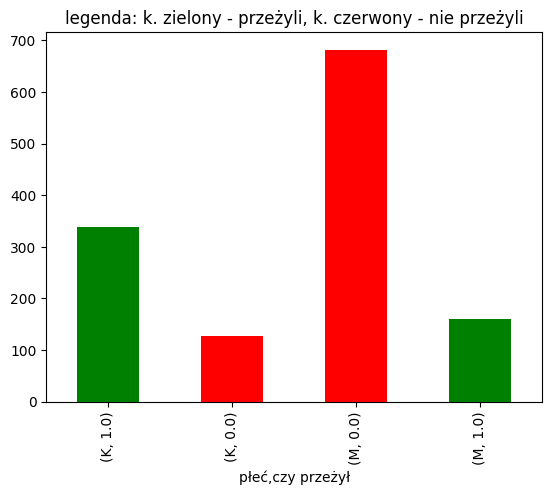

In [27]:
#ogólna macierz korelacji za dużo nam nie pokazuje, spróbujmy pogrupować dane, aby poszukać mocniejszych korelacji
#zaczniemy od sprawdzenia jak to wygląda wg płci 
colors = ['green','red','red','green']
df.groupby('płeć')['czy przeżył'].value_counts().plot(kind='bar',title='legenda: k. zielony - przeżyli, k. czerwony - nie przeżyli', color=colors);

In [28]:
#widzimy powyżej, że śmiertelność mężczyzn jest dużo wyższa niż kobiet
#sprawdzamy jaki był rozkład procentowy kobiet i mężczyzn na pokładzie pod względem statystyk przeżywalności:
ile_m_przez = ((df['czy przeżył']==1.0)&(df['płeć']=='M')).sum()
ile_k_przez = ((df['czy przeżył']==1.0)&(df['płeć']=='K')).sum()
ile_m_przez_pro = ((ile_m_przez / 843)*100).round()
ile_k_przez_pro = ((ile_k_przez / 466)*100).round()

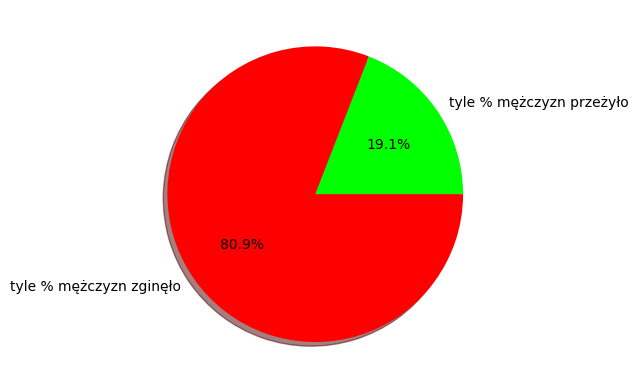

In [29]:
kolorki = ['lime','red']
etykiety = ['tyle % mężczyzn przeżyło','tyle % mężczyzn zginęło']
plt.pie([ile_m_przez, (843-ile_m_przez)], autopct='%1.1f%%', shadow=True, labels=etykiety,colors=kolorki);

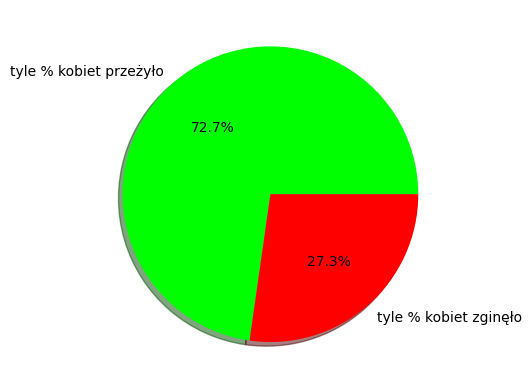

In [30]:
etykiety2 = ['tyle % kobiet przeżyło','tyle % kobiet zginęło']
plt.pie([ile_k_przez, (466-ile_k_przez)], autopct='%1.1f%%', shadow=True, labels=etykiety2, colors=kolorki);

## OBSERWACJE: 

### - zdecydowanie dużo więcej kobiet przeżyło katastrofę (aż blisko 73% kobiet w porównaniu do 19% mężczyzn). Być może dlatego, że na łodziach ratunkowych pierwszeństwo miały kobiety, a mężczyźni byli drudzy w kolejce do uratowania

In [31]:
df.groupby('nr klasy')['czy przeżył'].size()

nr klasy
1.0    323
2.0    277
3.0    709
Name: czy przeżył, dtype: int64

In [32]:
df.groupby('nr klasy')['czy przeżył'].value_counts()

nr klasy  czy przeżył
1.0       1.0            200
          0.0            123
2.0       0.0            158
          1.0            119
3.0       0.0            528
          1.0            181
Name: count, dtype: int64

In [33]:
#sprawdzamy jaki był rozkład procentowy kobiet i mężczyzn na pokładzie, o których wiemy:
ile_przez_klasa_1 = (200 / 323) * 100
ile_przez_klasa_2 = (119 / 277) * 100
ile_przez_klasa_3 = (181 / 709) * 100
ile_przez_klasa_1, ile_przez_klasa_2, ile_przez_klasa_3

(61.91950464396285, 42.96028880866426, 25.52891396332863)

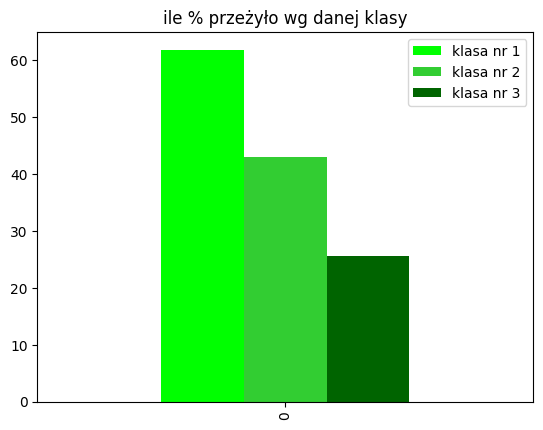

In [34]:
klasa_przez = {'klasa nr 1':[ile_przez_klasa_1], 
               'klasa nr 2':[ile_przez_klasa_2],
               'klasa nr 3':[ile_przez_klasa_3]}
colors = ['lime','limegreen','darkgreen']
df_kp = pd.DataFrame(klasa_przez)
df_kp.round(2).plot(kind='bar',title='ile % przeżyło wg danej klasy',color=colors);


## OBSERWACJE: 

### - powyższa wizualizacja pokazuje korelację między klasą a przeżywalnością: im wyższa klasa tym większa była szansa na przeżycie. Najwięcej procent ocalałych podróżowało klasą nr 1 (blisko 62% pasażerów przeżyło w tej klasie), a najmniejszy klasą nr 3 (tylko ok. 25% przeżyło w tej klasie)

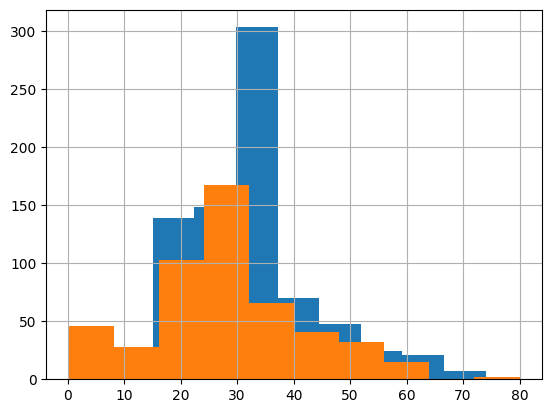

In [35]:
#sprawdzimy jeszcze jak ma się wiek do przeżywalności 
df.groupby('czy przeżył')['wiek'].hist();

## OBSERWACJE: 

### - największy odsetek osób, które nie przeżyły mieści się w zakresie między ok. 30 a 37 lat. Dzieci do 15 lat miały większą szansę na przeżycie niż pozostali (widzimy to po tym, że kolor niebieski nie góruje tutaj nad pomarańczowym tak jak w innych zakresach) 

# EDA: Krok 6 - badanie wartości odstających

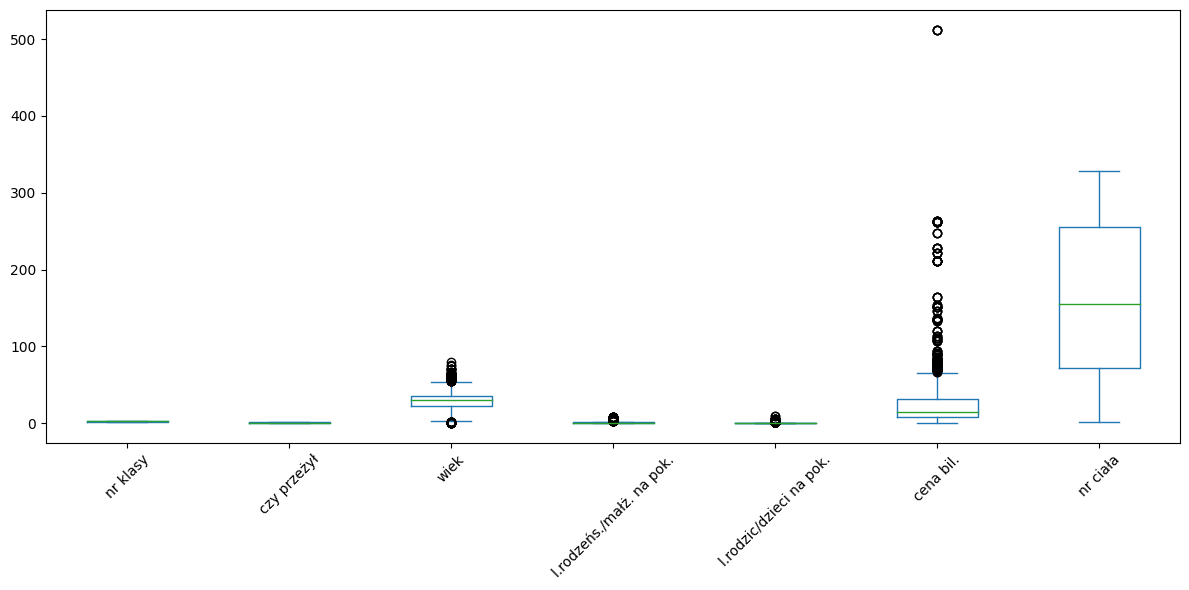

In [37]:
df.plot(kind='box', figsize=(12, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

## OBSERWACJE:

### - najwięcej wartości odstających ma kolumna z ceną biletu, a druga z wiekiem
### - przyjrzyjmy się im bliżej:

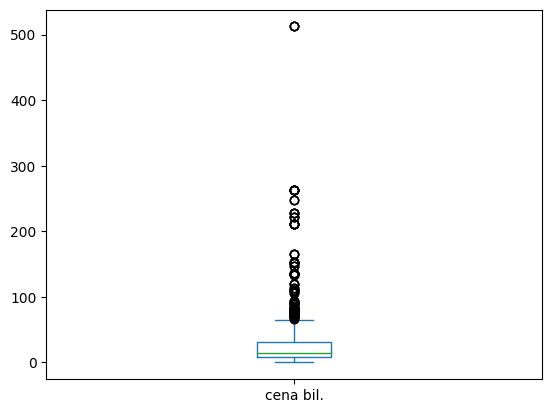

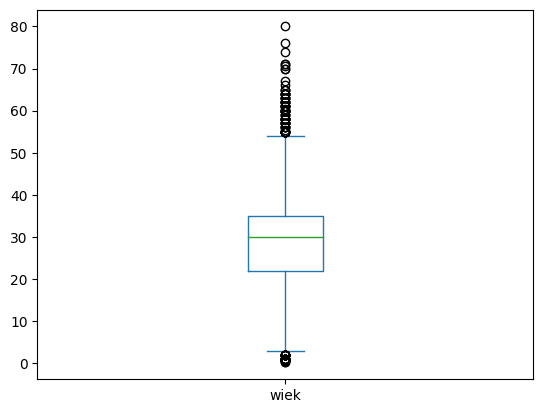

In [38]:
df['cena bil.'].plot(kind='box'), plt.show(), df['wiek'].plot(kind='box'), plt.show();

### ponówmy funkcję describe i sprawdźmy jakie były odchylenia standardowe 

In [39]:
tdf = df[['imię','wiek','cena bil.']]
tdf.describe()

wiek    cena bil.
count  1309.000000  1308.000000
mean     29.881135    33.295479
std      12.883199    51.758668
min       0.166700     0.000000
25%      22.000000     7.895800
50%      29.881135    14.454200
75%      35.000000    31.275000
max      80.000000   512.329200

## OBSERWACJE:

### - Wartości odstające w wykresach pudełkowych dla WIEKU I CENY BILETU prawdpodobnie nie wynikają z błędów, lecz z faktu, że odchylenia standardowe dla WIEKU to zakres od 17 lat do 41 lat, a dla cen biletów to od 18 do 84, a zatem reszta wartości która wykracza znacznie poza te średnie zakresy są uznawane za odchylenia
### - Wrócimy jeszcze do sprawdzenia brakujących wartości:

In [40]:
y = df[df['nr ciała'].isna()&df['nr kabiny'].isna()&df['nr łodzi rat.'].isna()&df['destynacja'].isna()]
y.nunique()

nr klasy                      3
czy przeżył                   2
imię                        362
płeć                          2
wiek                         53
l.rodzeńs./małż. na pok.      6
l.rodzic/dzieci na pok.       6
nr biletu                   307
cena bil.                    92
nr kabiny                     0
pocz. port                    3
nr łodzi rat.                 0
nr ciała                      0
destynacja                    0
dtype: int64

### - w tym podzbiorze danych, gdzie dla 4 kolumn mamy wartości puste, na 362 osoby nie przeżyło 360. A to oznacza, że to może być powodem, dlaczego nie udało się pozyskać tych konkretnych informacji.

# <span style='color:green '> WNIOSKI KOŃCOWE </span>

### Z tej bazy danych wynika, że: 
> ### **1. 64,4% gości o których wiemy stanowili mężczyźni**, a w mniejszości były kobiety stanowiąc 35,6%
> ### **2. zdecydowanie dużo więcej kobiet przeżyło katastrofę** (aż 73% kobiet w porównaniu do 19% mężczyzn). Prawdopodobnie dlatego, że **na łodziach ratunkowych pierwszeństwo miały kobiety**, a mężczyźni byli drudzy w kolejce do uratowania
> ### **3. im wyższa klasa podróży na statku tym większy procent ocalałych** (w klasie nr 1 przeżyło blisko 62% pasażerów, w klasie nr 2 blisko 43%, a w klasie nr 3 tylko 25%)
> ### **4.** **Dzieci do 15 roku życia miały większą szansę na przeżycie**. Największy odsetek osób, które nie przeżyły mieści się w zakresie wiekowym **między ok. 30 a 37 lat**.
### Uwagi dodatkowe
> ### **brakujące wartości dla pasażerów dot. ich numerów ciał, kabin, wieku czy destynacji** można usprawiedliwić tym, że **ciała nie zostały odnalezione (utonęły), a więc i nie były ponumerowane**, natomiast informacje dotyczące kabin, wieku czy destynacji mogły **nie zostać ujawnione przez pasażerów, bo nie było takiej możliwości**. Pozostałe wybiórcze braki prawpodobnie wynikają z tego, że np. pasażerowie celowo nie podali takich informacji.

In [ ]:
!jupyter nbconvert titanic_eda_PIOTR_raport.ipynb --to html --no-input --no-prompt --output titanic_eda_raport_PIOTR.html